# Import Required Libraries

In [2]:
# Basic packages
import os
import sys
from typing import List, Dict
import warnings
warnings.filterwarnings("ignore")

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



# tensorflow packages
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import (Dense, 
                                     Input)
from tensorflow.keras.models import Model
                        

2.19.0


# Load Dataset 

#### 1. Dataset Information

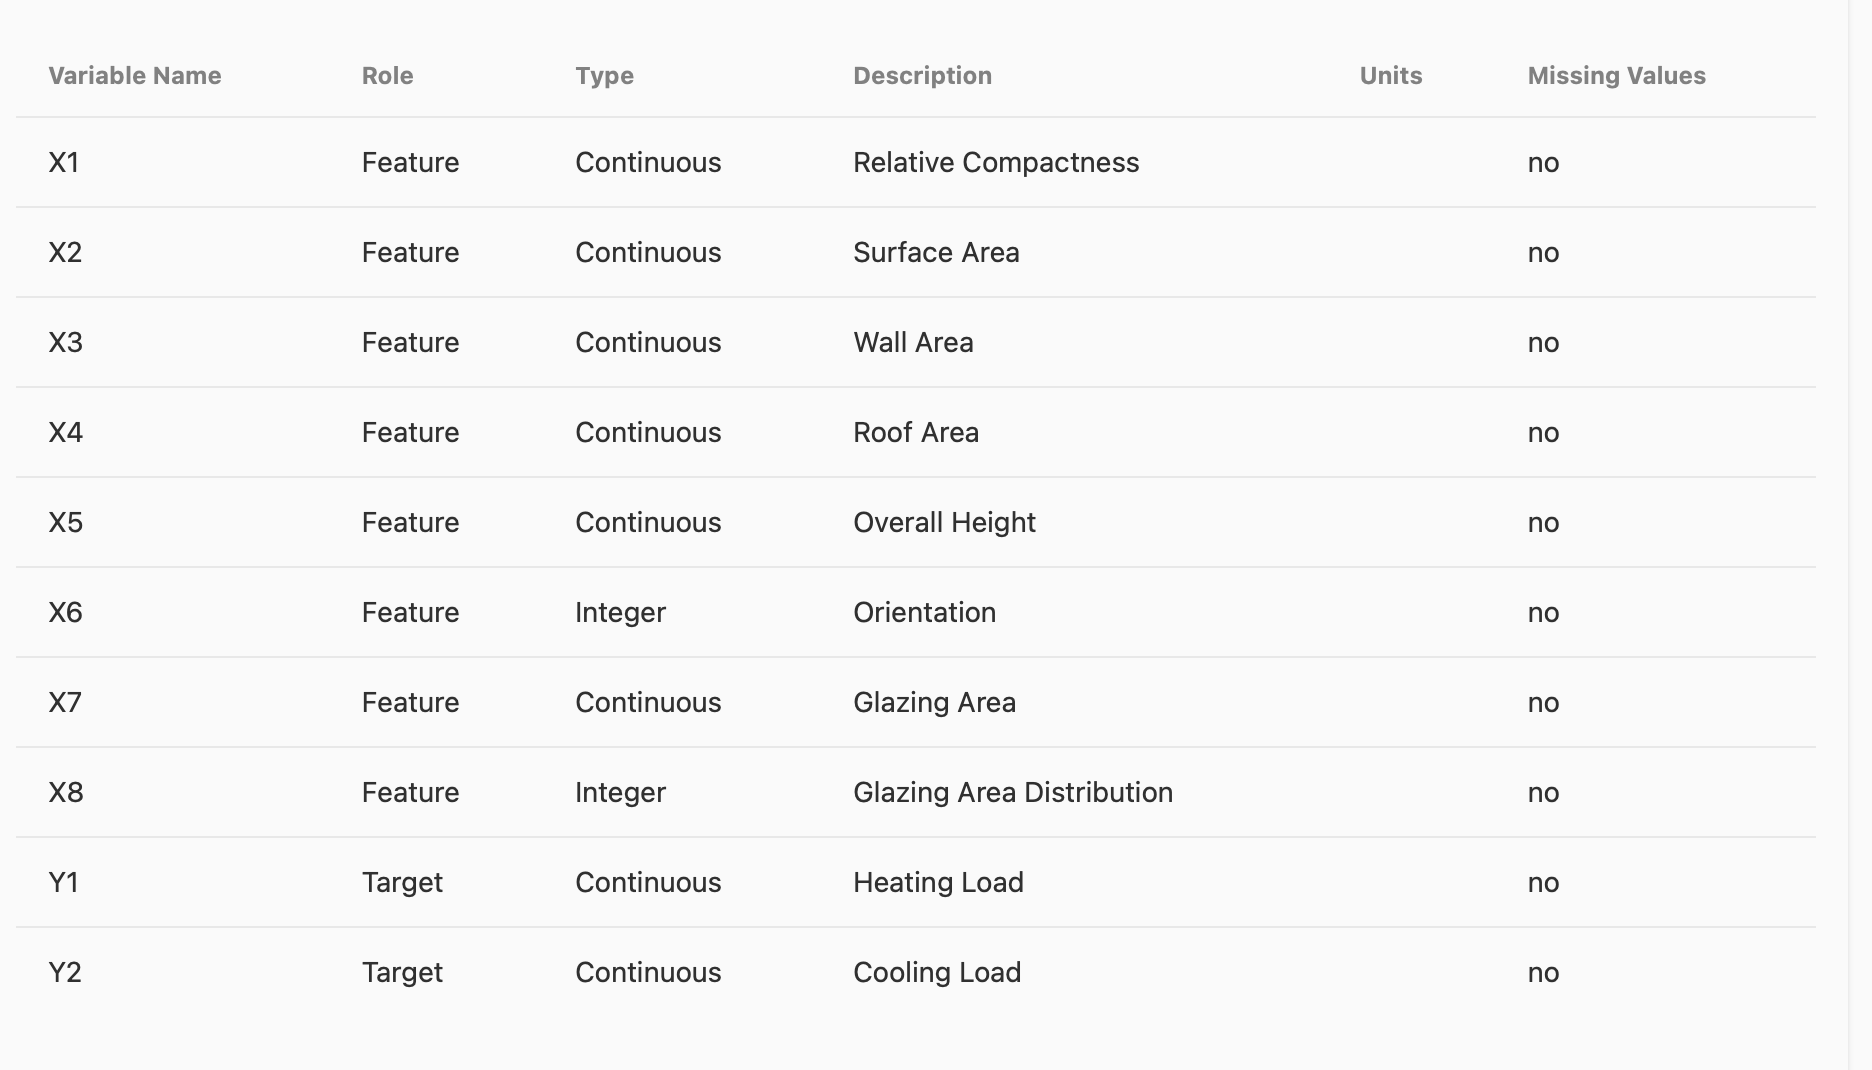


This is project is to assess the Heating load and Cooling load requirements of buildings. We have information about the building "Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", and "Glazing Area Distribution"

In [3]:
data = pd.read_csv("./data/ENB2012_data.csv")
print(f"====== Total No.of Records: {data.shape[0]} ====== ")
print(f"====== Total No.of Columns: {data.shape[1]} ====== ")
data.head()

====== Total No.of Records: 768 ====== 
====== Total No.of Columns: 10 ====== 


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Train_Test_Split

In [27]:
def split_array_by_ratio(X:np.ndarray, split_ratio: float) -> [np.ndarray, np.ndarray]:
    """
        Splits the array into two parts based on the split ratio

        Args:
            X (np.ndarray) : Input Array that has to be split.
            split_ratio (float) : split ratio

        Returns:
            return list of numpy array.
    """
    split_index = int(np.ceil(X.shape[0] * split_ratio))
    split_1, split_2 = X[:split_index, :], X[split_index:, :]

    return split_1, split_2    

In [26]:
X, y = data.drop(["Y1","Y2"], axis = 1).to_numpy(), data[["Y1", "Y2"]].to_numpy()
print(f"Shape of X : {X.shape}")
print(f"Shape of y : {y.shape}")

# Train and Test Splits 
X_train, X_test = split_array_by_ratio(X, split_ratio= 0.70)
y_train, y_test = split_array_by_ratio(y, split_ratio=0.70)

# Split y_train into y1_train and y2_train
y1_train, y2_train = y_train[:, 0], y_train[:, 1]


# Now again divide the Test numpy array into test and validation split
X_val, X_test = split_array_by_ratio(X_test, split_ratio = 0.50)
y_val, y_test = split_array_by_ratio(y_test, split_ratio = 0.50)

#Split both y_val and y_test
y1_val, y2_val, y1_test, y2_test = y_val[:, 0], y_val[:, 1], y_test[:, 0], y_test[:, 1]


print(f"Shape of the X_train:{X_train.shape}")
print(f"Shape of the X_val:{X_val.shape}")
print(f"Shape of the X_test:{X_test.shape}")
print(f"Shape of the y1_train:{y1_train.shape}")
print(f"Shape of the y2_train:{y2_train.shape}")
print(f"Shape of the y1_val:{y1_val.shape}")
print(f"Shape of the y2_val:{y2_val.shape}")
print(f"Shape of the y1_test:{y1_test.shape}")
print(f"Shape of the y2_test:{y2_test.shape}")

Shape of X : (768, 8)
Shape of y : (768, 2)
Shape of the X_train:(538, 8)
Shape of the X_val:(115, 8)
Shape of the X_test:(115, 8)
Shape of the y1_train:(538,)
Shape of the y2_train:(538,)
Shape of the y1_val:(115,)
Shape of the y2_val:(115,)
Shape of the y1_test:(115,)
Shape of the y2_test:(115,)


# Neural Network Architecture - Functional API